In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow import keras
import seaborn as sn

In [2]:
wdir = 'C:\\Users\\Beichen\\Desktop\\intro_ML_csce878_Fall2020\\final_project\\'
lc = pd.read_excel(wdir+'projectData.xlsx')

In [3]:
#porpotion of the land use classes
lc_classes = np.unique(lc.values[:,7],return_counts=True)
prop_classes = lc_classes[1]/lc.values.shape[0]
prop_classes

array([0.32981107, 0.07798673, 0.17808351, 0.32541696, 0.04287744,
       0.04582429])

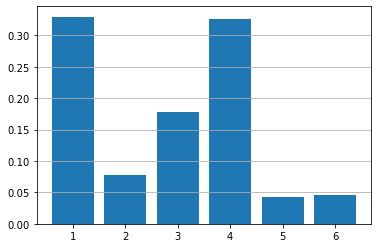

In [4]:
plt.bar(lc_classes[0],prop_classes)
plt.grid(axis = 'y')
plt.show()

Class=0, n=37829 32.981%
Class=1, n=8945 7.799%
Class=2, n=20426 17.808%
Class=3, n=37325 32.542%
Class=4, n=4918 4.288%
Class=5, n=5256 4.582%


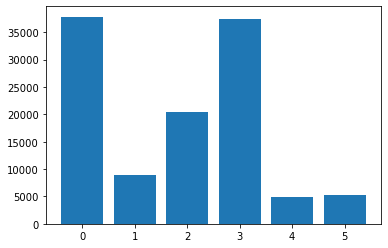

In [6]:
#imbalanced data preprocessing
data = lc.values
X, y = data[:,:-2], data[:,-2]
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in sorted(counter.items()):
    per = v/len(y)*100
    print('Class=%d, n=%d %.3f%%' %(k, v, per))
#plot distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [23]:
#split the data set
y = y.reshape(len(y),1)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size = 0.2, random_state = 42)

Class=0, n=30263 (16.667%)
Class=1, n=30263 (16.667%)
Class=2, n=30263 (16.667%)
Class=3, n=30263 (16.667%)
Class=4, n=30263 (16.667%)
Class=5, n=30263 (16.667%)


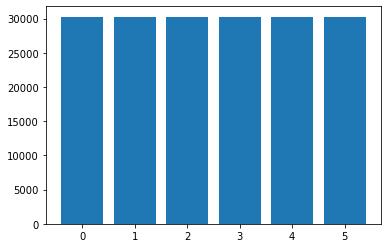

In [24]:
oversample = SMOTE()
X_sampled, y_sampled = oversample.fit_resample(X_train,y_train)
#summarize distribution
counter = Counter(y_sampled)
for k,v in sorted(counter.items()):
	per = v / len(y_sampled) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [25]:
OneHot = OneHotEncoder()
y_sampled = y_sampled.reshape(len(y_sampled),1)
y_sampled_encoded = OneHot.fit_transform(y_sampled).toarray()
X_train, X_val, y_train, y_val = train_test_split(X_sampled,y_sampled_encoded, test_size = 0.8, random_state = 42)
y_test = y_test.reshape(len(y_test),1)
y_test_encoded = OneHot.fit_transform(y_test).toarray()

In [26]:
ANN = Sequential()
ANN.add(Dense(20, input_dim=7, activation='relu'))
ANN.add(Dense(16,activation='relu'))
ANN.add(Dense(12,activation='relu'))
ANN.add(Dense(6,activation='softmax'))
ANN.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy','AUC'])
history = ANN.fit(X_train, y_train, epochs=150, batch_size=20)
accuracy_val = ANN.evaluate(X_val, y_val)

Epoch 1/150
1816/1816 [==============================] - 1s 742us/step - loss: 0.2981 - accuracy: 0.5821 - auc: 0.8770
Epoch 2/150
1816/1816 [==============================] - 1s 740us/step - loss: 0.2263 - accuracy: 0.7182 - auc: 0.9362
Epoch 3/150
1816/1816 [==============================] - 1s 735us/step - loss: 0.2141 - accuracy: 0.7267 - auc: 0.9432
Epoch 4/150
1816/1816 [==============================] - 1s 715us/step - loss: 0.2038 - accuracy: 0.7367 - auc: 0.9488
Epoch 5/150
1816/1816 [==============================] - 1s 709us/step - loss: 0.1962 - accuracy: 0.7420 - auc: 0.9529
Epoch 6/150
1816/1816 [==============================] - 1s 713us/step - loss: 0.1902 - accuracy: 0.7473 - auc: 0.9562
Epoch 7/150
1816/1816 [==============================] - 1s 713us/step - loss: 0.1865 - accuracy: 0.7520 - auc: 0.9581
Epoch 8/150
1816/1816 [==============================] - 1s 707us/step - loss: 0.1839 - accuracy: 0.7534 - auc: 0.9594
Epoch 9/150
1816/1816 [=========================

In [27]:
predictions = ANN.predict(X_test.astype('float32'))
confusion_matrix = tf.math.confusion_matrix(labels=tf.argmax(y_test_encoded, 1)
    , predictions=tf.argmax(predictions, 1), num_classes=None, weights=None, dtype=tf.dtypes.int32,name=None)
from tensorflow.keras.metrics import Accuracy
m = Accuracy()
m.update_state(tf.argmax(y_test_encoded, 1), tf.argmax(predictions, 1))
m.result().numpy()

0.76438534

In [28]:
X_test.shape

(22940, 7)

In [29]:
X_train.shape

(36315, 7)

In [30]:
confusion_matrix

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[5769,  353,  420,  416,  602,    6],
       [  58, 1608,   88,    5,   26,    4],
       [ 555,  786, 2394,   67,  149,  134],
       [ 526,   35,   79, 5891,  934,    0],
       [  73,    3,   20,   51,  837,    0],
       [   1,    1,   13,    0,    0, 1036]])>

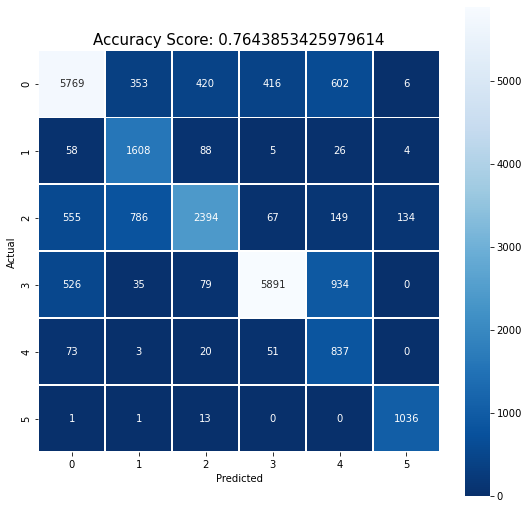

In [31]:
plt.figure(figsize=(9,9))
sn.heatmap(confusion_matrix, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(m.result().numpy())
plt.title(all_sample_title, size = 15);

0.78839207

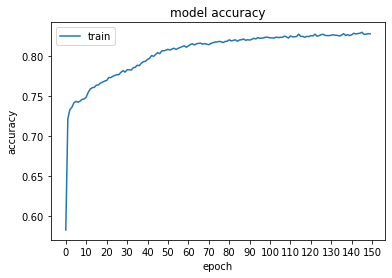

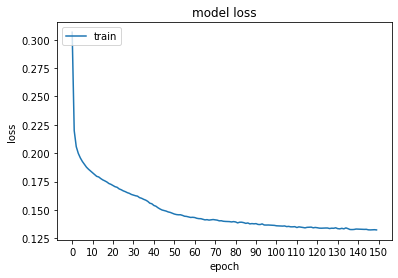

In [245]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(np.arange(0,160,10))
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(np.arange(0,160,10))
plt.legend(['train'], loc='upper left')
plt.show()

In [144]:
tf.argmax(y_test_encoded, 1)

<tf.Tensor: shape=(80290,), dtype=int64, numpy=array([2, 5, 2, ..., 2, 5, 4], dtype=int64)>

In [154]:
y_test

array([[2],
       [5],
       [2],
       ...,
       [2],
       [5],
       [4]])

In [146]:
tf.argmax(predictions, 1)

<tf.Tensor: shape=(80290,), dtype=int64, numpy=array([2, 5, 2, ..., 2, 5, 4], dtype=int64)>

In [166]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
skf = KFold(n_splits=10,random_state=42)
for TrainingIdx, TestingIdx in skf.split(X_sampled, y_sampled_encoded):
    X_train_skf, X_test_skf = X_sampled[TrainingIdx,:],X_sampled[TestingIdx,:]
    y_train_skf, y_test_skf = y_sampled_encoded[TrainingIdx,:],y_sampled_encoded[TestingIdx,:]
    clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(12,8,6), activation='relu',max_iter=100)
    ANN = Sequential()
    ANN.add(Dense(12, input_dim=8, activation='relu'))
    ANN.add(Dense(8,activation='relu'))
    ANN.add(Dense(6,activation='softmax'))
    ANN.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy','AUC'])
    ANN.fit(X_train_skf, y_train_skf, epochs=20, batch_size=20)
    y_val = ANN.predict(X_test_skf)
    y_pred = ANN.predict(X_test)
    acc_val = accuracy_score(y_test_skf,y_val)
    acc_pred = accuracy_score(y_test,y_pred)
    print(acc_val,acc_pred)

Epoch 1/20
920/920 [==============================] - 1s 702us/step - loss: 0.3148 - accuracy: 0.5753 - auc: 0.8817
Epoch 2/20
920/920 [==============================] - 1s 712us/step - loss: 0.1076 - accuracy: 0.9348 - auc: 0.9940
Epoch 3/20
920/920 [==============================] - 1s 704us/step - loss: 0.0353 - accuracy: 0.9887 - auc: 0.9992
Epoch 4/20
920/920 [==============================] - 1s 703us/step - loss: 0.0158 - accuracy: 0.9948 - auc: 0.9999
Epoch 5/20
920/920 [==============================] - 1s 681us/step - loss: 0.0093 - accuracy: 0.9962 - auc: 1.0000
Epoch 6/20
920/920 [==============================] - 1s 701us/step - loss: 0.0061 - accuracy: 0.9974 - auc: 1.0000
Epoch 7/20
920/920 [==============================] - 1s 705us/step - loss: 0.0042 - accuracy: 0.9980 - auc: 1.0000
Epoch 8/20
920/920 [==============================] - 1s 678us/step - loss: 0.0031 - accuracy: 0.9986 - auc: 1.0000
Epoch 9/20
920/920 [==============================] - 1s 716us/step - lo

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [167]:
X_test

array([[0.03417205065488815, 0.042291563004255295, 0.05004950612783432,
        ..., 0.23305244743824005, 0.27919620275497437, 1],
       [0.11691825836896896, 0.18060535192489624, 0.2563319802284241,
        ..., 0.3553740382194519, 0.3347702622413635, 3],
       [0.04478151351213455, 0.06338837742805481, 0.06685196608304977,
        ..., 0.32768702507019043, 0.22162838280200958, 1],
       ...,
       [0.060819175094366074, 0.06784054636955261, 0.0725661963224411,
        ..., 0.29138433933258057, 0.21609064936637878, 1],
       [0.04245869815349579, 0.06295379996299744, 0.07056013494729996,
        ..., 0.338056743144989, 0.3312872648239136, 3],
       [0.03834664821624756, 0.05206321179866791, 0.07162338495254517,
        ..., 0.7463743090629578, 0.30502253770828247, 2]], dtype=object)

In [168]:
X_test_skf

array([[0.06290973, 0.08184324, 0.09157763, ..., 0.32749784, 0.20763846,
        1.        ],
       [0.05602475, 0.07421747, 0.09007657, ..., 0.28437376, 0.22737841,
        4.        ],
       [0.05111583, 0.05940468, 0.08107923, ..., 0.25984523, 0.22646333,
        4.        ],
       ...,
       [0.05386414, 0.0648867 , 0.07274145, ..., 0.31919175, 0.14292178,
        4.        ],
       [0.05003192, 0.06749807, 0.08775263, ..., 0.28887361, 0.34609163,
        1.        ],
       [0.14160533, 0.22694358, 0.34012291, ..., 0.36239037, 0.32075045,
        3.        ]])